# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset.

One has to predict the insurance fraud  in the Automobile insurance dataset.

In [2]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Dataset
df_amt=pd.read_csv("Auto_Insurance_Claims_amount.csv") 
df_fraud=pd.read_csv("Automobile_insurance_fraud.csv")

In [4]:
df_amt.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42.0,0.0,8.0,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38.0,0.0,2.0,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44.0,0.0,1.0,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [101]:
df_fraud=pd.read_csv("Automobile_insurance_fraud.csv")
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# Let's first predict the claims amount

In [7]:
df_amt.shape

(6733, 26)

In [8]:
#Checking the null values in the dataset
df_amt.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   1
Monthly Premium Auto             1
Months Since Last Claim          1
Months Since Policy Inception    1
Number of Open Complaints        1
Number of Policies               1
Policy Type                      1
Policy                           1
Claim Reason                     1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [9]:
df_amt.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6728,LY93301,US,IA,Iowa,1249.573971,No,Basic,Bachelor,2/3/11,Unemployed,...,85.0,0.0,2.0,Corporate Auto,Corporate L3,Scratch/Dent,Agent,292.800000,Two-Door Car,Medsize
6729,FG63647,US,OK,Oklahoma,1287.777650,No,Premium,Bachelor,1/25/11,Unemployed,...,89.0,0.0,2.0,Personal Auto,Personal L1,Hail,Agent,561.600000,Four-Door Car,Medsize
6730,VX79712,US,KS,Kansas,677.592417,No,Extended,Doctor,2/20/11,Employed,...,13.0,1.0,7.0,Personal Auto,Personal L3,Other,Branch,412.800000,Two-Door Car,Medsize
6731,UH59257,US,KS,Kansas,754.091147,No,Extended,Doctor,2/14/11,Employed,...,30.0,2.0,4.0,Personal Auto,Personal L3,Hail,Agent,689.507724,Two-Door Car,Medsize
6732,ME84824,US,NE,Nebraska,598.977393,Yes,Premium,College,1/19/11,Employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Let's drop the last row as it contains Null Values
df_amt.drop(df_amt.tail(1).index,inplace=True)
df_amt.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6727,SA84892,US,MO,Missouri,491.637322,No,Extended,High School or Below,1/7/11,Employed,...,13.0,0.0,1.0,Corporate Auto,Corporate L3,Hail,Agent,871.200000,SUV,Medsize
6728,LY93301,US,IA,Iowa,1249.573971,No,Basic,Bachelor,2/3/11,Unemployed,...,85.0,0.0,2.0,Corporate Auto,Corporate L3,Scratch/Dent,Agent,292.800000,Two-Door Car,Medsize
6729,FG63647,US,OK,Oklahoma,1287.777650,No,Premium,Bachelor,1/25/11,Unemployed,...,89.0,0.0,2.0,Personal Auto,Personal L1,Hail,Agent,561.600000,Four-Door Car,Medsize
6730,VX79712,US,KS,Kansas,677.592417,No,Extended,Doctor,2/20/11,Employed,...,13.0,1.0,7.0,Personal Auto,Personal L3,Other,Branch,412.800000,Two-Door Car,Medsize
6731,UH59257,US,KS,Kansas,754.091147,No,Extended,Doctor,2/14/11,Employed,...,30.0,2.0,4.0,Personal Auto,Personal L3,Hail,Agent,689.507724,Two-Door Car,Medsize


In [11]:
#Checking the null values in the dataset
df_amt.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [12]:
#Lets check the datatypes of the column
df_amt.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [13]:
# Describing categorical variables
df_amt.describe(include=np.object)

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
count,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732,6732
unique,6732,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,TP87527,US,IA,Iowa,No,Basic,Bachelor,1/27/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Four-Door Car,Medsize
freq,1,6732,2063,2063,5762,4114,2015,146,4208,3446,4240,3948,5045,2606,2779,2576,3389,4739


In [14]:
# Customer can be dropped as it is unique
# We can drop Country as all are same
# We can drop "State" as State Code is already there
# We can also drop "Effective To Date"
df_amt.drop(columns=['Customer','Country','State','Effective To Date'],inplace=True)

df_amt.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,KS,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,NE,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42.0,0.0,8.0,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,OK,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38.0,0.0,2.0,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,MO,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,KS,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44.0,0.0,1.0,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


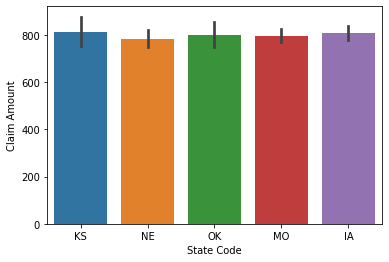

In [15]:
# State wise Claim amt
sns.barplot(x="State Code",y="Claim Amount",data=df_amt)
plt.show()

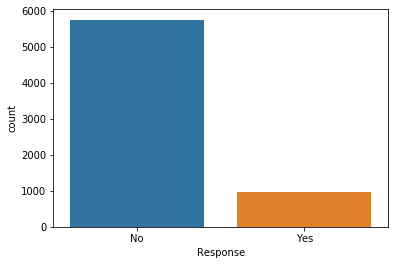

In [16]:
# Response
sns.countplot(x="Response",data=df_amt)
plt.show()
# "No" is the most frequent response

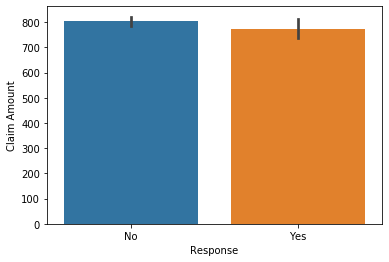

In [17]:
sns.barplot(x="Response",y="Claim Amount",data=df_amt)
plt.show()

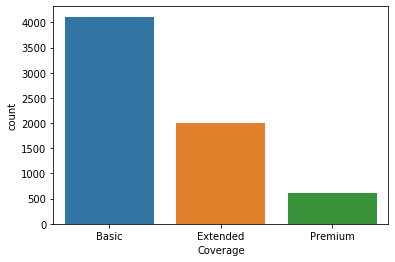

In [18]:
# Coverage
sns.countplot(x="Coverage",data=df_amt)
plt.show()
# Most people have basic coverage

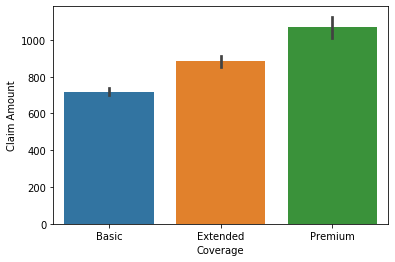

In [19]:
sns.barplot(x="Coverage",y="Claim Amount",data=df_amt)
plt.show()

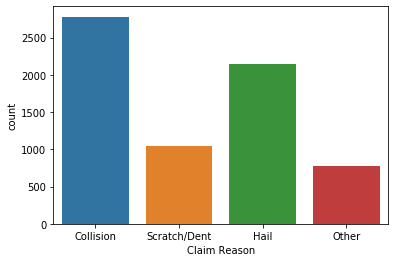

In [20]:
# Claim reasons
sns.countplot(x="Claim Reason",data=df_amt)
plt.show()
# "Collision" is the most frequent

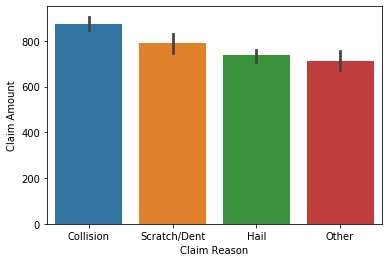

In [21]:
sns.barplot(x="Claim Reason",y="Claim Amount",data=df_amt)
plt.show()

In [22]:
df_amt.columns

Index(['State Code', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

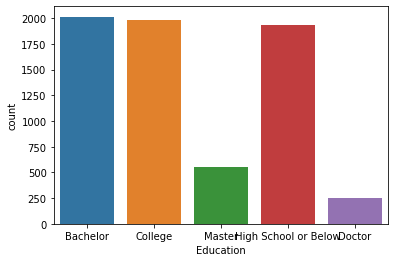

In [23]:
# Education
sns.countplot(x="Education",data=df_amt)
plt.show()
# Very Few People have done Masters or Doctorate

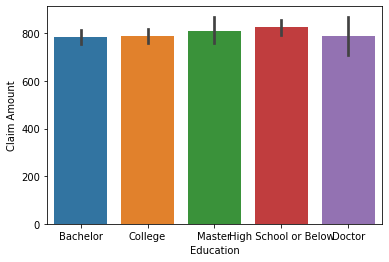

In [24]:
sns.barplot(x="Education",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is highest for School or below and for Bachelors

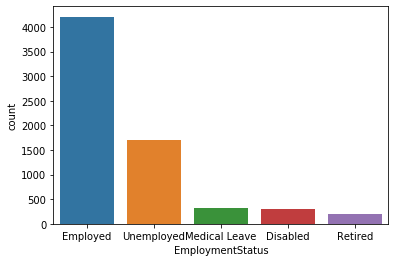

In [25]:
# EmploymentStatus
sns.countplot(x="EmploymentStatus",data=df_amt)
plt.show()
# Maximum People have employment.

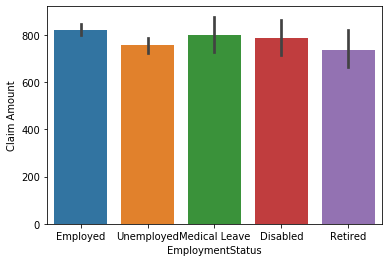

In [26]:
sns.barplot(x="EmploymentStatus",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is highest for employed and lesser for Retired and Unemployed

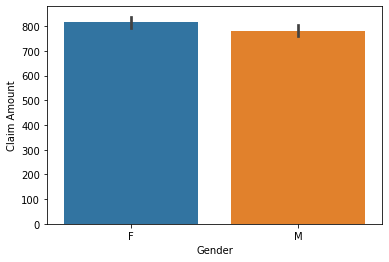

In [27]:
# Features ['State Code', 'Claim Amount', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
#       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints',
#       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

sns.barplot(x="Gender",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is slightly higher for Females

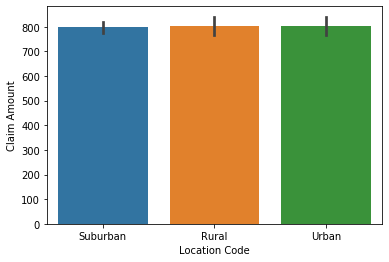

In [28]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status', , 'Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']

sns.barplot(x="Location Code",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is similar for each loaction

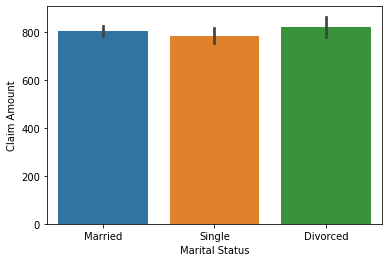

In [29]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status', , 'Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']

sns.barplot(x="Marital Status",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is almost similar for each Status

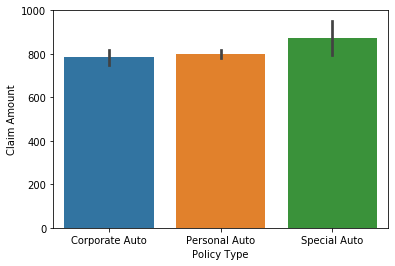

In [30]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']

sns.barplot(x="Policy Type",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is higher for Special auto

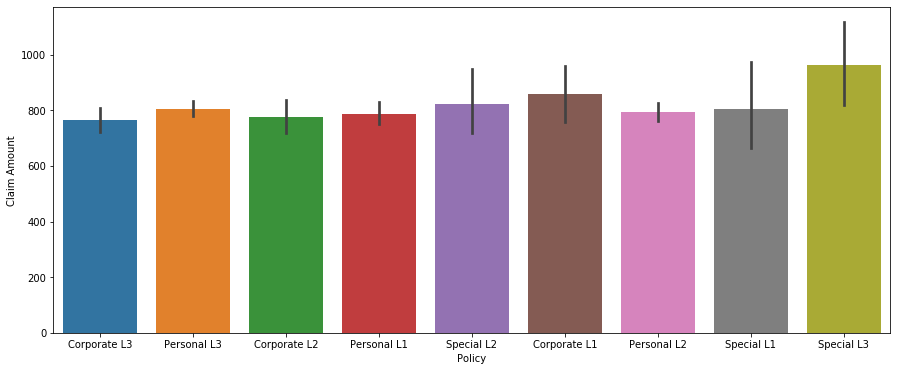

In [31]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']

plt.figure(figsize=(15,6))
sns.barplot(x="Policy",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is higher for Special L3

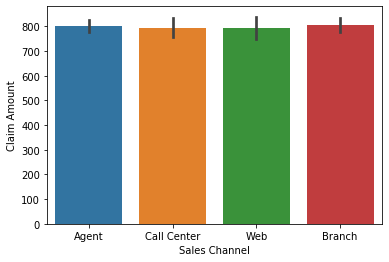

In [32]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']


sns.barplot(x="Sales Channel",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is equally spaced

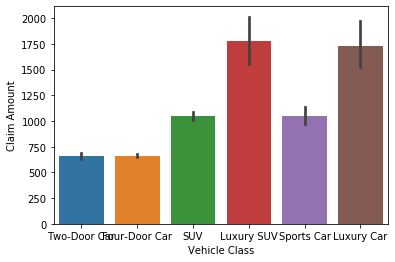

In [33]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']


sns.barplot(x="Vehicle Class",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is high for Luxury products

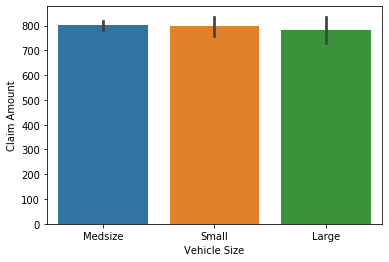

In [34]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']


sns.barplot(x="Vehicle Size",y="Claim Amount",data=df_amt)
plt.show()
# Claim Amount is equally spaced


 Total Claim Amount 



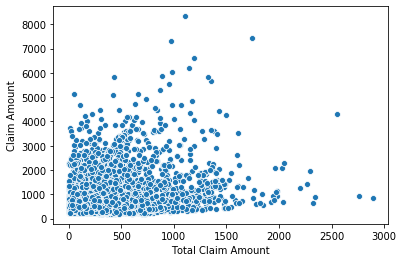


 Income 



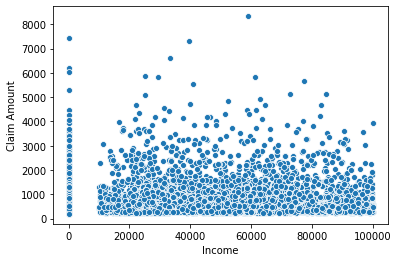


 Monthly Premium Auto 



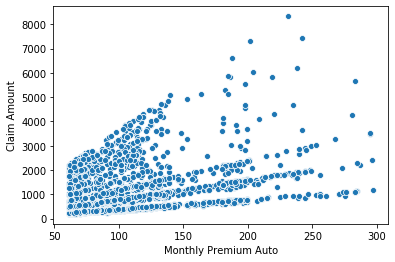


 Months Since Last Claim 



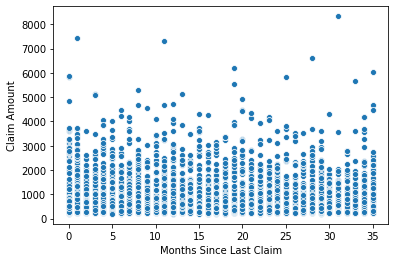


 Months Since Policy Inception 



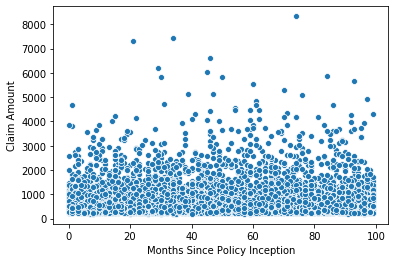


 Number of Open Complaints 



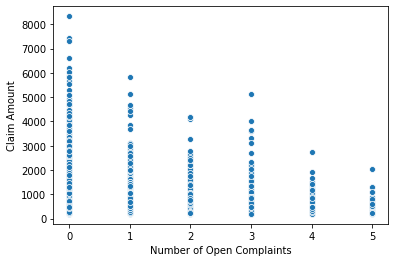


 Number of Policies 



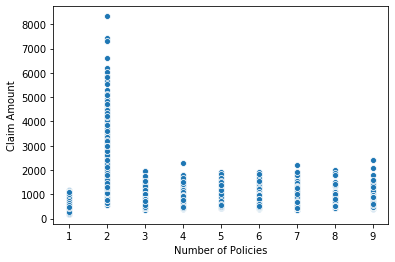

In [35]:
#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size']

#   Continous Features = [Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']

cont = ['Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim', 
            'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies']
for i in cont:
    print('\n',i,'\n')
    sns.scatterplot(x=i,y='Claim Amount',data=df_amt)
    plt.show()

In [36]:
# We note that ['Number of Open Complaints','Number of Policies'] are also Categorical in nature

#  Label = 'Claim Amount',
#  Categorical Features = ['State Code', 'Response', 'Coverage', 'Education',
#       'EmploymentStatus', 'Gender',  'Location Code',
#       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
#      'Sales Channel','Vehicle Class', 'Vehicle Size','Number of Open Complaints','Number of Policies']

#   Continous Features = ['Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
#       'Months Since Policy Inception']

In [37]:
#Label encoding Categorical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat=['State Code', 'Response', 'Coverage', 'Education',
      'EmploymentStatus', 'Gender',  'Location Code',
       'Marital Status','Policy Type', 'Policy', 'Claim Reason',
      'Sales Channel','Vehicle Class', 'Vehicle Size','Number of Open Complaints','Number of Policies']
for i in cat:
    df_amt[i]=le.fit_transform(df_amt[i])
df_amt.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,5.0,0,0,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,42.0,0,7,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,38.0,0,1,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,65.0,0,6,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,44.0,0,0,1,3,0,0,138.130879,0,1


In [38]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df_amt))
print(df_amt.shape)
df_amt=df_amt[(z<3).all(axis=1)]
print(df_amt.shape)

# A lot of rows removed

(6732, 22)
(6259, 22)


In [39]:
# Checking for skewness
cont = ['Total Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception']
df_amt[cont].skew()
# We need to treat

Total Claim Amount               0.727246
Income                           0.285381
Monthly Premium Auto             1.330499
Months Since Last Claim          0.284240
Months Since Policy Inception    0.058371
dtype: float64

In [40]:
for col in cont:
    if df_amt.skew().loc[col]>0.55:
        df_amt[col]=np.log1p(df_amt[col])
    if df_amt.skew().loc[col]<-0.55:
        df_amt[col]=np.square(df_amt[col])

In [41]:
df_amt[cont].skew()

Total Claim Amount              -1.122322
Income                           0.285381
Monthly Premium Auto             0.694475
Months Since Last Claim          0.284240
Months Since Policy Inception    0.058371
dtype: float64

In [42]:
# Treating skewness again
for col in cont:
    if df_amt.skew().loc[col]>0.55:
        df_amt[col]=np.log1p(df_amt[col])
    if df_amt.skew().loc[col]<-0.55:
        df_amt[col]=np.square(df_amt[col])
df_amt[cont].skew()

Total Claim Amount              -0.192263
Income                           0.285381
Monthly Premium Auto             0.609151
Months Since Last Claim          0.284240
Months Since Policy Inception    0.058371
dtype: float64

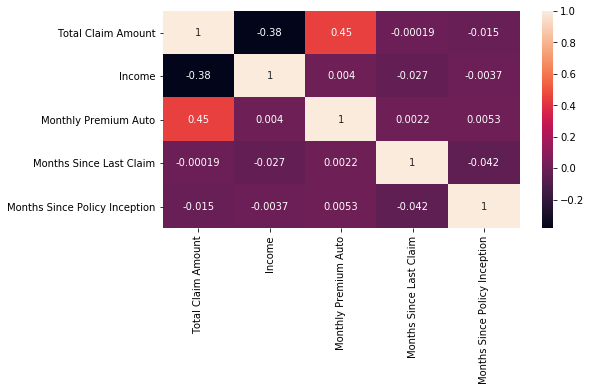

In [43]:
# Let's see the correlations among cotinous variables
plt.figure(figsize=(8,4))
sns.heatmap(df_amt[cont].corr(),annot=True)
# Not enough correlation among cotinous variables

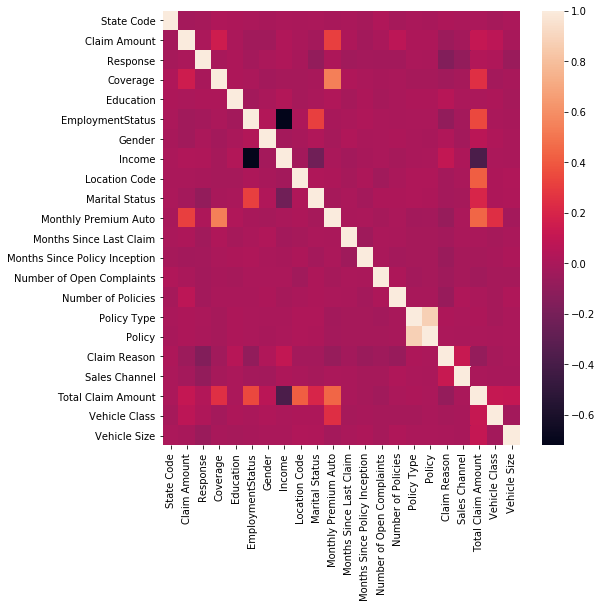

In [44]:
# Let's see the correlations for all variables
plt.figure(figsize=(8,8))
sns.heatmap(df_amt.corr())
# Policy and policy type seem to be highly correlated
# Also there's some negative correlation within Income and Employment Status

In [45]:
# Let's Separate our dataset into Features and target
x=df_amt.drop(columns=["Claim Amount"])
y=df_amt[["Claim Amount"]]

In [46]:
# Let's do Standard Scaling on the Continous variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[cont]=sc.fit_transform(x[cont])
x.head()

,State Code,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,0,0,0,1,0,0.602655,1,1,-0.812622,...,-1.533182,0,0,0,2,0,0,0.069995,5,1
1,3,0,1,0,4,0,-1.244927,1,2,0.373403,...,-0.204284,0,7,1,5,3,0,2.353857,0,1
2,4,0,2,0,1,0,0.356186,1,1,0.886169,...,-0.347949,0,1,1,5,0,0,0.760503,5,1
3,2,0,0,0,4,1,-1.244927,1,1,0.817819,...,0.621787,0,6,0,1,0,2,0.631811,3,1
4,1,0,0,0,1,1,0.194292,0,2,-0.591751,...,-0.132452,0,0,1,3,0,0,-1.207974,0,1


In [47]:
x[cont].skew()

Total Claim Amount              -0.192263
Income                           0.285381
Monthly Premium Auto             0.609151
Months Since Last Claim          0.284240
Months Since Policy Inception    0.058371
dtype: float64

# Modelling - Part 1

In [48]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [49]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [50]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  57  is  0.13952940282391624


In [51]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 250}

In [52]:
rfr=RandomForestRegressor(n_estimators=250)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  49  is  0.7779057748512749


In [53]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 14}

In [55]:
# Taking odd
knr=KNeighborsRegressor(n_neighbors=15)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  48  is  0.24574103905744027


In [59]:
# SVM

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'poly'}

In [60]:
svr=SVR(kernel="poly",C=10)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  70  is  0.0882963625343951


# Crossvalidation

In [61]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y)

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y)



Linear Regression


Mean r2 score for regressor:  0.09821750628714546
standard deviation in r2 score for regressor:  0.016631910015839715
[0.07092312 0.09439379 0.09641103 0.10842599 0.1209336 ]


RandomForestRegressor


Mean r2 score for regressor:  0.7482293863624369
standard deviation in r2 score for regressor:  0.019937545676969384
[0.73907969 0.75074732 0.74255483 0.72446977 0.78429532]


KNeighborsRegressor


Mean r2 score for regressor:  0.20298555700709145
standard deviation in r2 score for regressor:  0.014636334819883754
[0.18512871 0.20078541 0.18946821 0.21904219 0.22050325]


SVM REGRESSOR


Mean r2 score for regressor:  0.01675144470654726
standard deviation in r2 score for regressor:  0.013214653214892414
[0.00141531 0.03230535 0.01665025 0.00262196 0.03076436]


In [62]:
# Based on above results let's Random Forest Regressor Regression

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 49,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [64]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  231.39418429561
r2_score is:  0.7806951901283371


In [65]:
import joblib
joblib.dump(rfr,'claim_amt.pkl')

['claim_amt.pkl']

In [66]:
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [102]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [103]:
df_fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [104]:
# Let's drop '_c39'. All are NaN
df_fraud.drop('_c39',axis=1,inplace=True)

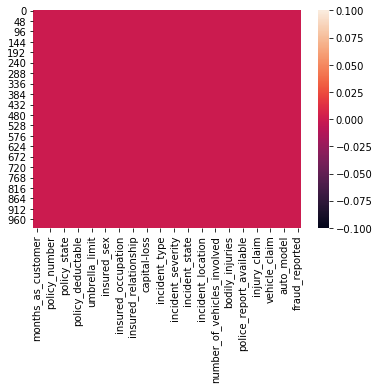

In [105]:
sns.heatmap(df_fraud.isnull())
# No Null Values

In [106]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [107]:
# Let's convert to date
df_fraud['policy_bind_date'] = pd.to_datetime(df_fraud['policy_bind_date'])

In [108]:
# Describing categorical variables
df_fraud.describe(include=np.object)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,2280 4th Ave,?,?,Saab,RAM,N
freq,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [109]:
# Let's drop : 'policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city' and 'incident_location' 
# as there are many uniques
drop = ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']
df_fraud = df_fraud.drop(drop, axis = 1)

In [110]:
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [111]:
df_fraud['fraud_reported']=le.fit_transform(df_fraud['fraud_reported'])

In [112]:
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-06-09,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


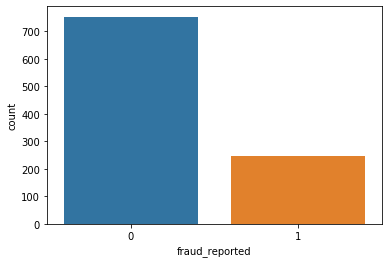

In [113]:
sns.countplot(df_fraud['fraud_reported'])

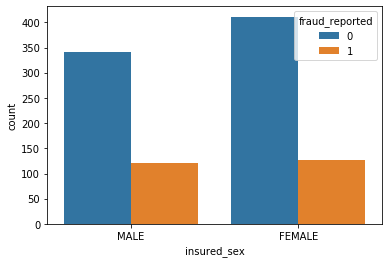

In [114]:
sns.countplot(df_fraud['insured_sex'],hue=df_fraud['fraud_reported'])
# For both, Fraud reported(Yes/1) is less than no(0)

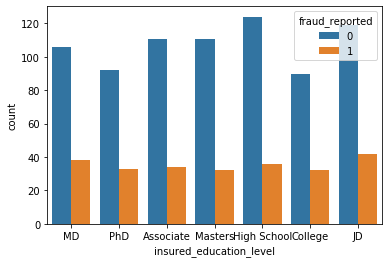

In [115]:
sns.countplot(df_fraud['insured_education_level'],hue=df_fraud['fraud_reported'])
# JD seems to have higher frauds

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

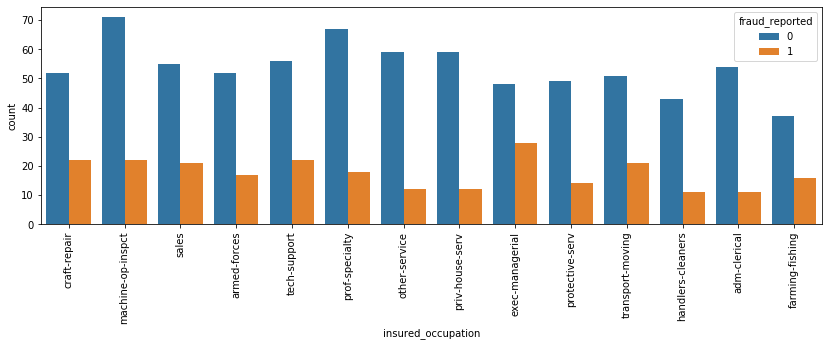

In [116]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['insured_occupation'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Exec-Managerial seem to have higher frauds

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

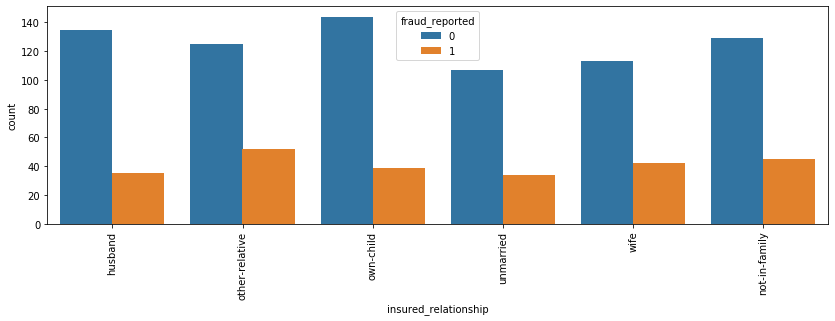

In [117]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['insured_relationship'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Other Relatives seem to have higher frauds

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

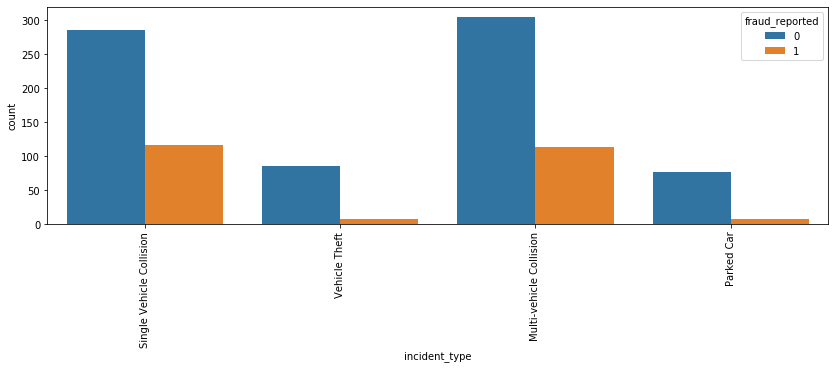

In [118]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['incident_type'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Multi-vehicle and single vehicle collisions seem to have higher frauds

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

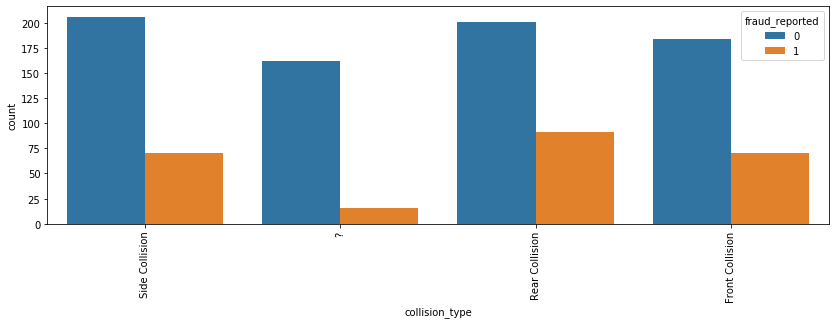

In [119]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['collision_type'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Rear collisions seem to have higher frauds

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

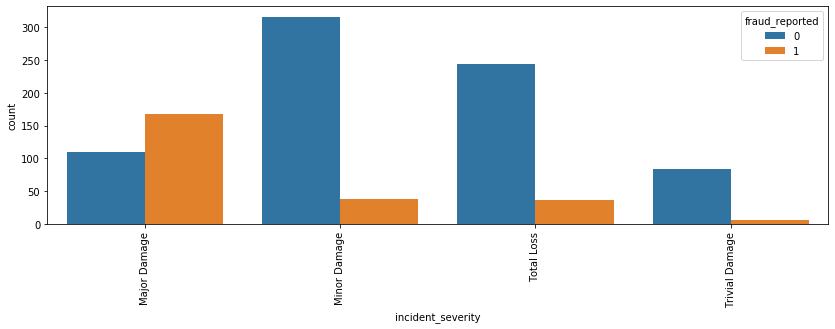

In [120]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['incident_severity'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Major damages seem to have higher frauds

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

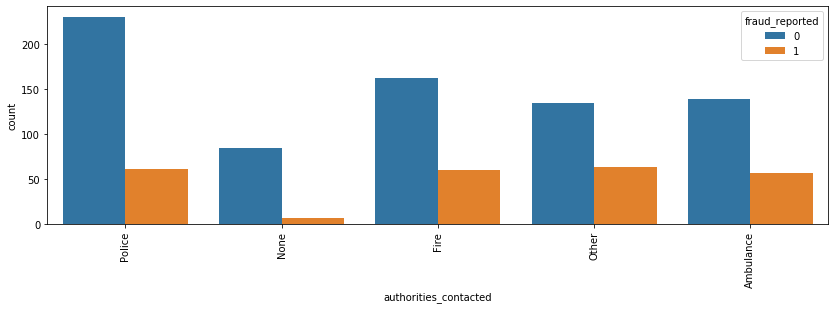

In [121]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['authorities_contacted'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Max people have contacted police and None seems to have least frauds

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

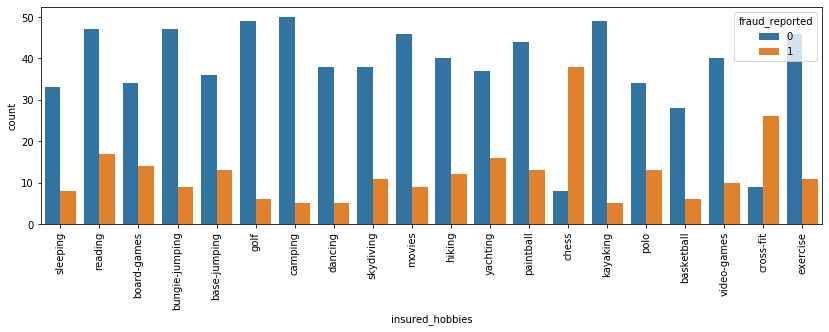

In [122]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['insured_hobbies'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Chess and Cross-fit seem to have max frauds

In [123]:
# Let's use Chess and Cross-fit and keep all others in 'Others'
def Other(y):
    if(y == 'chess') | (y == 'cross-fit'):
        return(y)
    else:
        return('others')
df_fraud['insured_hobbies'] = df_fraud['insured_hobbies'].apply(Other)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

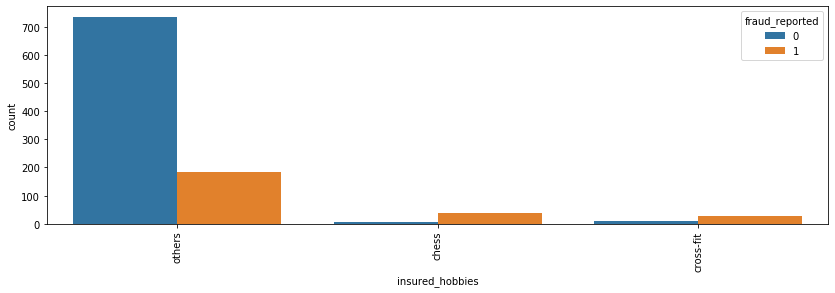

In [124]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['insured_hobbies'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Chess and Cross-fit seem to have max frauds

(array([ 16.,  74., 187., 147., 214., 139., 109.,  36.,  51.,  27.]),
 array([19. , 23.5, 28. , 32.5, 37. , 41.5, 46. , 50.5, 55. , 59.5, 64. ]),
 <a list of 10 Patch objects>)

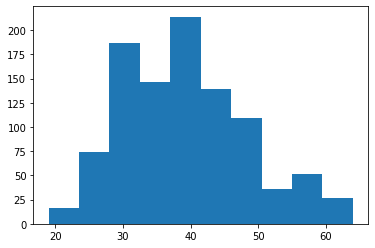

In [128]:
plt.hist(df_fraud['age'])

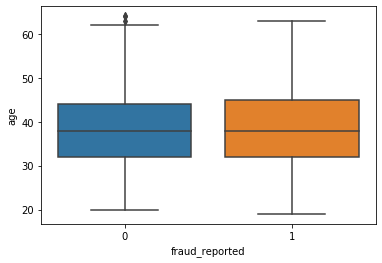

In [130]:
sns.boxplot(df_fraud.fraud_reported,df_fraud.age)

In [131]:
# Let's segregate age based on bins
bins = [18, 22, 35, 50, 65]
df_fraud['age_bin'] = pd.cut(df_fraud['age'], bins)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

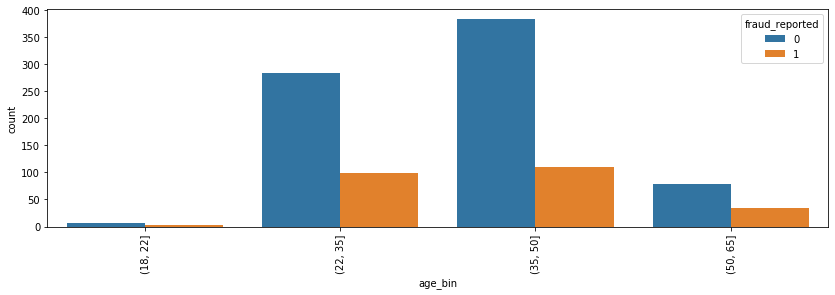

In [133]:
df_fraud.drop('age',axis=1,inplace=True)
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['age_bin'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)
# Most people are in age group 35-50

(array([ 88., 102., 153., 130., 148., 167.,  80.,  43.,  42.,  47.]),
 array([  0. ,  47.9,  95.8, 143.7, 191.6, 239.5, 287.4, 335.3, 383.2,
        431.1, 479. ]),
 <a list of 10 Patch objects>)

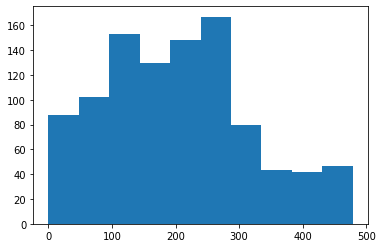

In [134]:
plt.hist(df_fraud['months_as_customer'])

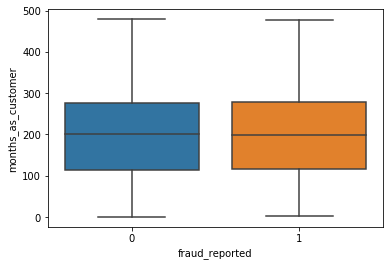

In [135]:
sns.boxplot(df_fraud.fraud_reported,df_fraud.months_as_customer)

In [138]:
# Let's bin this feature
df_fraud['months_as_customer'].max()

479

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

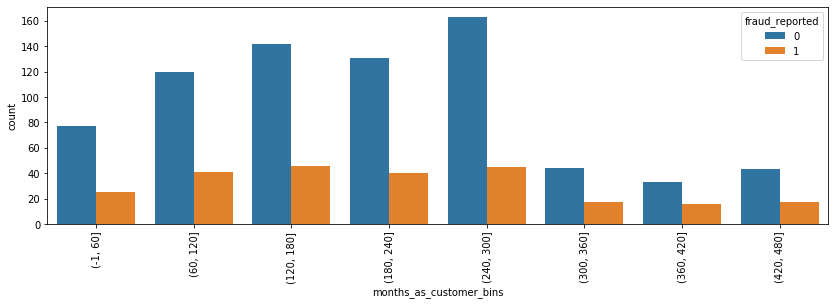

In [139]:
bins = [-1, 60, 120, 180, 240, 300, 360, 420, 480]
df_fraud['months_as_customer_bins'] = pd.cut(df_fraud['months_as_customer'], bins)
df_fraud.drop('months_as_customer',axis=1,inplace=True)
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['months_as_customer_bins'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

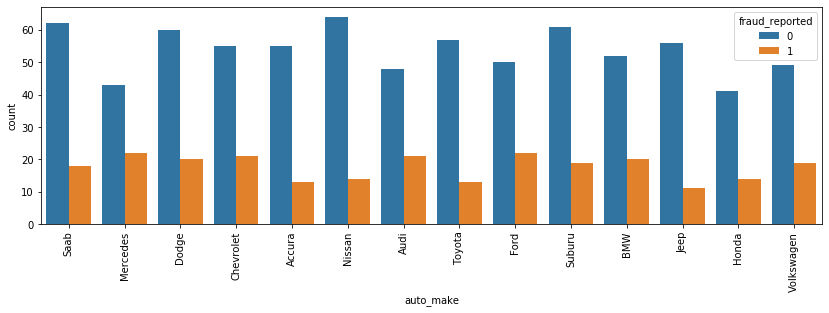

In [140]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['auto_make'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)

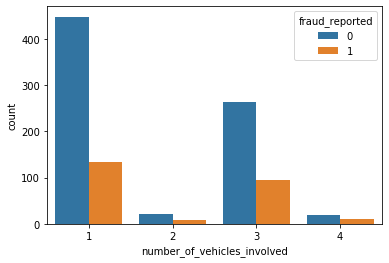

In [143]:
sns.countplot(df_fraud['number_of_vehicles_involved'],hue=df_fraud['fraud_reported'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

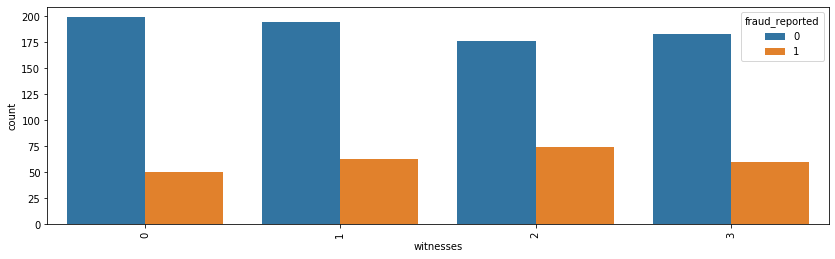

In [144]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['witnesses'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)

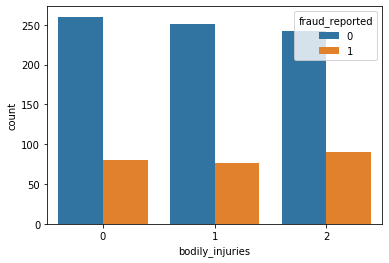

In [145]:
sns.countplot(df_fraud['bodily_injuries'],hue=df_fraud['fraud_reported'])

(array([178.,   2.,  27.,  87., 194., 229., 173.,  78.,  23.,   9.]),
 array([1.00000e+02, 1.15820e+04, 2.30640e+04, 3.45460e+04, 4.60280e+04,
        5.75100e+04, 6.89920e+04, 8.04740e+04, 9.19560e+04, 1.03438e+05,
        1.14920e+05]),
 <a list of 10 Patch objects>)

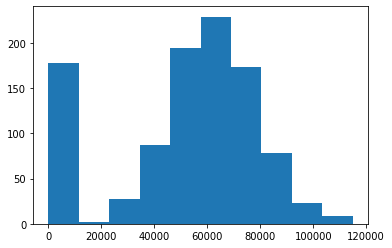

In [148]:
plt.hist(df_fraud['total_claim_amount'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

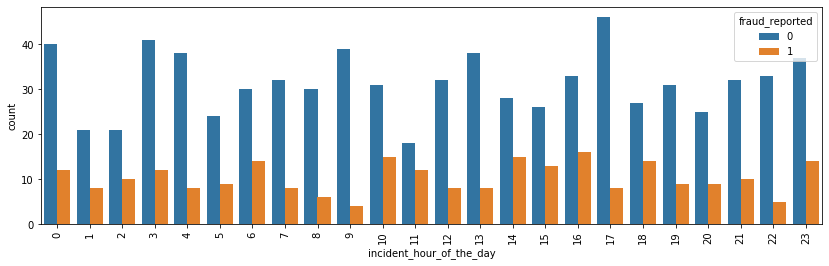

In [152]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['incident_hour_of_the_day'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

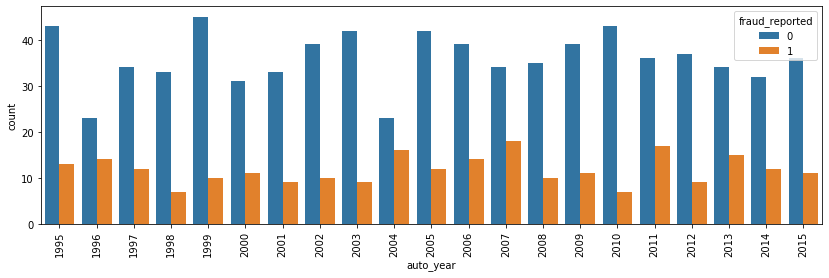

In [153]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud['auto_year'],hue=df_fraud['fraud_reported'])
plt.xticks(rotation=90)

In [154]:
df_fraud['policy_annual_premium'].describe()

count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

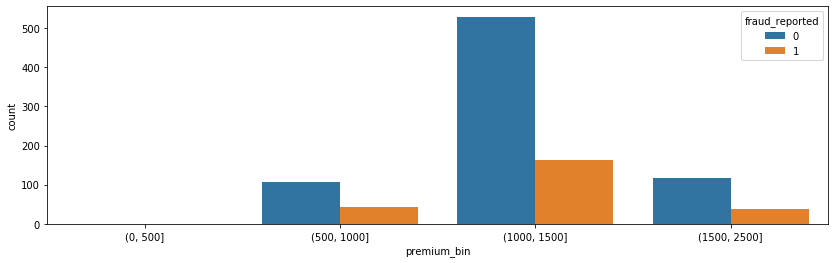

In [157]:
bins = [0, 500, 1000, 1500, 2500]
df_fraud['premium_bin'] = pd.cut(df_fraud['policy_annual_premium'], bins)
df_fraud.drop('policy_annual_premium',axis=1,inplace=True)
plt.figure(figsize=(14,4))
sns.countplot(df_fraud.premium_bin,hue=df_fraud['fraud_reported'])


In [158]:
df_fraud['policy_deductable'].describe()

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

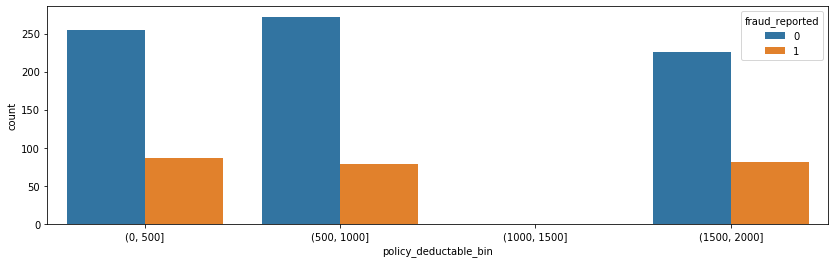

In [160]:
bins = [0, 500, 1000, 1500, 2000]
df_fraud['policy_deductable_bin'] = pd.cut(df_fraud['policy_deductable'], bins)
df_fraud.drop('policy_deductable',axis=1,inplace=True)
plt.figure(figsize=(14,4))
sns.countplot(df_fraud.policy_deductable_bin,hue=df_fraud['fraud_reported'])

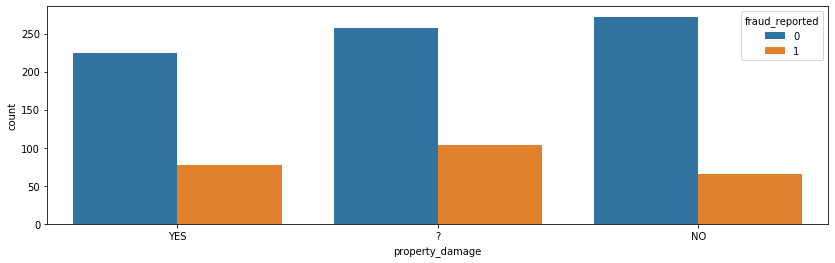

In [161]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud.property_damage,hue=df_fraud['fraud_reported'])

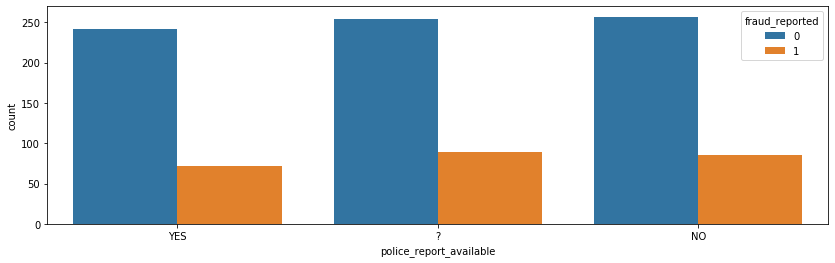

In [162]:
plt.figure(figsize=(14,4))
sns.countplot(df_fraud.police_report_available,hue=df_fraud['fraud_reported'])

In [164]:
df_fraud.columns

Index(['policy_number', 'policy_bind_date', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'age_bin',
       'months_as_customer_bins', 'premium_bin', 'policy_deductable_bin'],
      dtype='object')

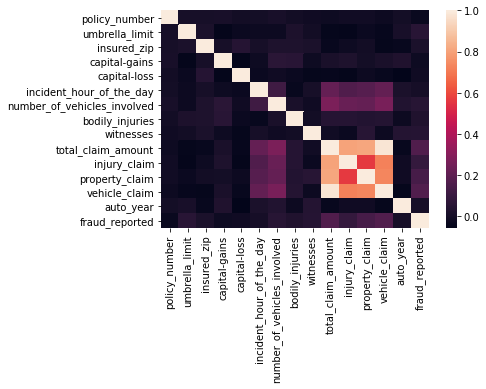

In [166]:
sns.heatmap(df_fraud.corr())

In [170]:
df_fraud['vehicle_claim'].sum()+df_fraud['property_claim'].sum()+df_fraud['injury_claim'].sum()

52761940

In [172]:
df_fraud['total_claim_amount'].sum()
# We can remove ['vehicle_claim','property_claim','injury_claim'] and kep only 'total_claim_amount' as it's the sum

52761940

In [173]:
df_fraud.drop(columns=['vehicle_claim','property_claim','injury_claim'],axis=1,inplace=True)

In [174]:
df_fraud.shape

(1000, 30)

In [177]:
# Still there are many columns, Based on EDA Let's try to reduce some of them and keep a few.
required_columns = ['insured_sex', 'insured_occupation',
       'insured_hobbies', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'witnesses', 'total_claim_amount', 'fraud_reported', 'age_bin',
       'months_as_customer_bins', 'premium_bin']

df = df_fraud[required_columns]
df.head()

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age_bin,months_as_customer_bins,premium_bin
0,MALE,craft-repair,others,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,2,71610,1,"(35, 50]","(300, 360]","(1000, 1500]"
1,MALE,machine-op-inspct,others,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,0,5070,1,"(35, 50]","(180, 240]","(1000, 1500]"
2,FEMALE,sales,others,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,3,34650,0,"(22, 35]","(120, 180]","(1000, 1500]"
3,FEMALE,armed-forces,others,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,2,63400,1,"(35, 50]","(240, 300]","(1000, 1500]"
4,MALE,sales,others,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,1,6500,0,"(35, 50]","(180, 240]","(1500, 2500]"


In [178]:
df.shape

(1000, 17)

In [179]:
# Let's label encode categorical values
categorical=['insured_sex','insured_occupation','insured_hobbies','incident_type','collision_type','incident_severity',
             'authorities_contacted','age_bin','months_as_customer_bins','premium_bin']
for col in categorical:
    df[col]=le.fit_transform(df[col])
df.head()

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age_bin,months_as_customer_bins,premium_bin
0,1,2,2,53300,0,2,3,0,4,5,1,2,71610,1,2,5,2
1,1,6,2,0,0,3,0,1,4,8,1,0,5070,1,2,3,2
2,0,11,2,35100,0,0,2,1,4,7,3,3,34650,0,1,2,2
3,0,1,2,48900,-62400,2,1,0,4,5,1,2,63400,1,2,4,2
4,1,11,2,66000,-46000,3,0,1,2,20,1,1,6500,0,2,3,3


In [182]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["fraud_reported"])
y=df[["fraud_reported"]]

In [183]:
# Let's do Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Modelling - Part 2

In [184]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
# For Classification let's focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [185]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean ROC_AUC score for classifier: ",c_scores.mean())
    print("standard deviation in ROC_AUC score for classifier: ",c_scores.std())
    print(c_scores)

In [186]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=max_aucroc_score(lg,x,y)

max auc roc score corresponding to  60  is  0.9133666711717799


In [187]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [188]:
rfc=RandomForestClassifier(n_estimators=100)
r_state=max_aucroc_score(rfc,x,y)

max auc roc score corresponding to  63  is  0.8753209893228815


In [189]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 17}

In [190]:
knn=KNeighborsClassifier(n_neighbors=17)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  63  is  0.8228814704689823


In [191]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'criterion': 'gini'}

In [192]:
dc=DecisionTreeClassifier(criterion="gini")
r_state=max_aucroc_score(dc,x,y)

max auc roc score corresponding to  65  is  0.815177726719827


In [193]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=max_aucroc_score(gnb,x,y)

max auc roc score corresponding to  63  is  0.8722800378429517


In [194]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=max_aucroc_score(gb,x,y)

max auc roc score corresponding to  92  is  0.8485606162995


In [195]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
r_state=max_aucroc_score(ad,x,y)

max auc roc score corresponding to  57  is  0.8422084065414245


In [196]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean ROC_AUC score for classifier:  0.852177086993738
standard deviation in ROC_AUC score for classifier:  0.046309101378392226
[0.85633333 0.819      0.78611975 0.91870523 0.88072713]


KNN Classifier


Mean ROC_AUC score for classifier:  0.8095156534666847
standard deviation in ROC_AUC score for classifier:  0.029437833245735227
[0.8552     0.7732     0.79389107 0.83085552 0.79443168]


DecisionTree Classifier


Mean ROC_AUC score for classifier:  0.696672343109429
standard deviation in ROC_AUC score for classifier:  0.05309272549785381
[0.63       0.64333333 0.70016218 0.75618327 0.75368293]


Logistic Regression Classifier


Mean ROC_AUC score for classifier:  0.8635259215209261
standard deviation in ROC_AUC score for classifier:  0.037924613101386555
[0.85986667 0.812      0.83362617 0.90823084 0.90390593]


Gaussian NB Classifier


Mean ROC_AUC score for classifier:  0.8605225571023111
standard deviation in ROC_AUC score for classifier:  0.04379710879

In [197]:
# Selecting GradientBoosting Classifier
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

Confusion matrix 
 [[129  20]
 [ 12  39]]
classification report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       149
           1       0.66      0.76      0.71        51

    accuracy                           0.84       200
   macro avg       0.79      0.82      0.80       200
weighted avg       0.85      0.84      0.84       200

AUC_Score: 0.815238847216739
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0]


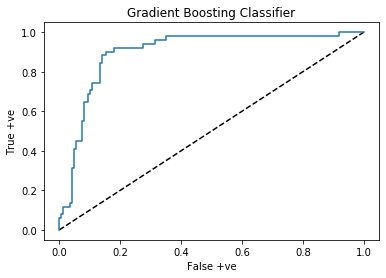

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
#print('r2 Score is:', r2_score(y_test,y_pred))
#print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Gradient Boosting Classifier')
plt.show
print(y_pred)